## NBA Injury Analysis

Useful reference: [2010 Study of Basketball Injuries](https://pmc.ncbi.nlm.nih.gov/articles/PMC3445097/#:~:text=The%20most%20games%20missed%20were,%2C%20weight%2C%20and%20NBA%20experience.)

"A total of 1094 players appeared in the database 3843 times (3.3 ± 2.6 seasons). Lateral ankle sprains were the most frequent orthopaedic injury (n, 1658; 13.2%), followed by patellofemoral inflammation (n, 1493; 11.9%), lumbar strains (n, 999; 7.9%), and hamstring strains (n, 413; 3.3%). The most games missed were related to patellofemoral inflammation (n, 10 370; 17.5%), lateral ankle sprains (n, 5223; 8.8%), knee sprains (n, 4369; 7.4%), and lumbar strains (n, 3933; 6.6%). **No correlations were found between injury rate and player demographics, including age, height, weight, and NBA experience**."

### Load & Clean Dataset

In [ ]:
# Importing necessary libraries
import pandas as pd

# Load dataset
dataset_url = "https://raw.githubusercontent.com/stevenLeecode/CSC398-NbaInjuries/refs/heads/main/final_player_data.csv"

nba_injuries_df = pd.read_csv(dataset_url)

# Display dataset head
nba_injuries_df.head()

,seas_id_x,season,player_id,player_x,pos_x,age_x,experience_x,lg_x,tm_x,g_x,...,blk,tov,pf,pts,Unnamed: 0,Date,Team,Notes,Injury_type,Injured
0,31871,2025,5025,A.J. Green,SG,25,3,NBA,MIL,5,...,0.0,1.0,1,17,0,1951-12-25,Bullets,placed on IL,placed,1.0
1,31872,2025,5210,AJ Johnson,SG,20,1,NBA,MIL,3,...,0.0,0.0,0,2,1,1952-12-26,Knicks,placed on IL with torn side muscle,placed,1.0
2,31873,2025,4219,Aaron Gordon,PF,29,11,NBA,DEN,4,...,2.0,8.0,8,62,2,1956-12-29,Knicks,placed on inactive list,placed,1.0
3,31874,2025,4582,Aaron Holiday,PG,28,7,NBA,HOU,1,...,0.0,0.0,0,0,3,1959-01-16,Lakers,player refused to play after being denied a ro...,No injury,0.0
4,31875,2025,4805,Aaron Nesmith,SF,25,5,NBA,IND,5,...,2.0,4.0,24,43,4,1961-11-26,Lakers,player reported for military duty,No injury,0.0


In [ ]:
# Drop 'Unnamed: 0' column
nba_injuries_df_cleaned = nba_injuries_df.drop(columns=['Unnamed: 0'])

# Displaying dataset head
nba_injuries_df_cleaned.head()

,seas_id_x,season,player_id,player_x,pos_x,age_x,experience_x,lg_x,tm_x,g_x,...,stl,blk,tov,pf,pts,Date,Team,Notes,Injury_type,Injured
0,31871,2025,5025,A.J. Green,SG,25,3,NBA,MIL,5,...,1.0,0.0,1.0,1,17,1951-12-25,Bullets,placed on IL,placed,1.0
1,31872,2025,5210,AJ Johnson,SG,20,1,NBA,MIL,3,...,0.0,0.0,0.0,0,2,1952-12-26,Knicks,placed on IL with torn side muscle,placed,1.0
2,31873,2025,4219,Aaron Gordon,PF,29,11,NBA,DEN,4,...,4.0,2.0,8.0,8,62,1956-12-29,Knicks,placed on inactive list,placed,1.0
3,31874,2025,4582,Aaron Holiday,PG,28,7,NBA,HOU,1,...,0.0,0.0,0.0,0,0,1959-01-16,Lakers,player refused to play after being denied a ro...,No injury,0.0
4,31875,2025,4805,Aaron Nesmith,SF,25,5,NBA,IND,5,...,4.0,2.0,4.0,24,43,1961-11-26,Lakers,player reported for military duty,No injury,0.0


In [ ]:
# Keeping only rows where 'Injured' column is 1 or 'Injury_type' is not null/empty
injury_related_df = nba_injuries_df_cleaned[
    (nba_injuries_df_cleaned['Injured'] == 1) |
    (nba_injuries_df_cleaned['Injury_type'].notna())
]

### Overall Trends in NBA Injuries

<Figure size 1400x1000 with 0 Axes>

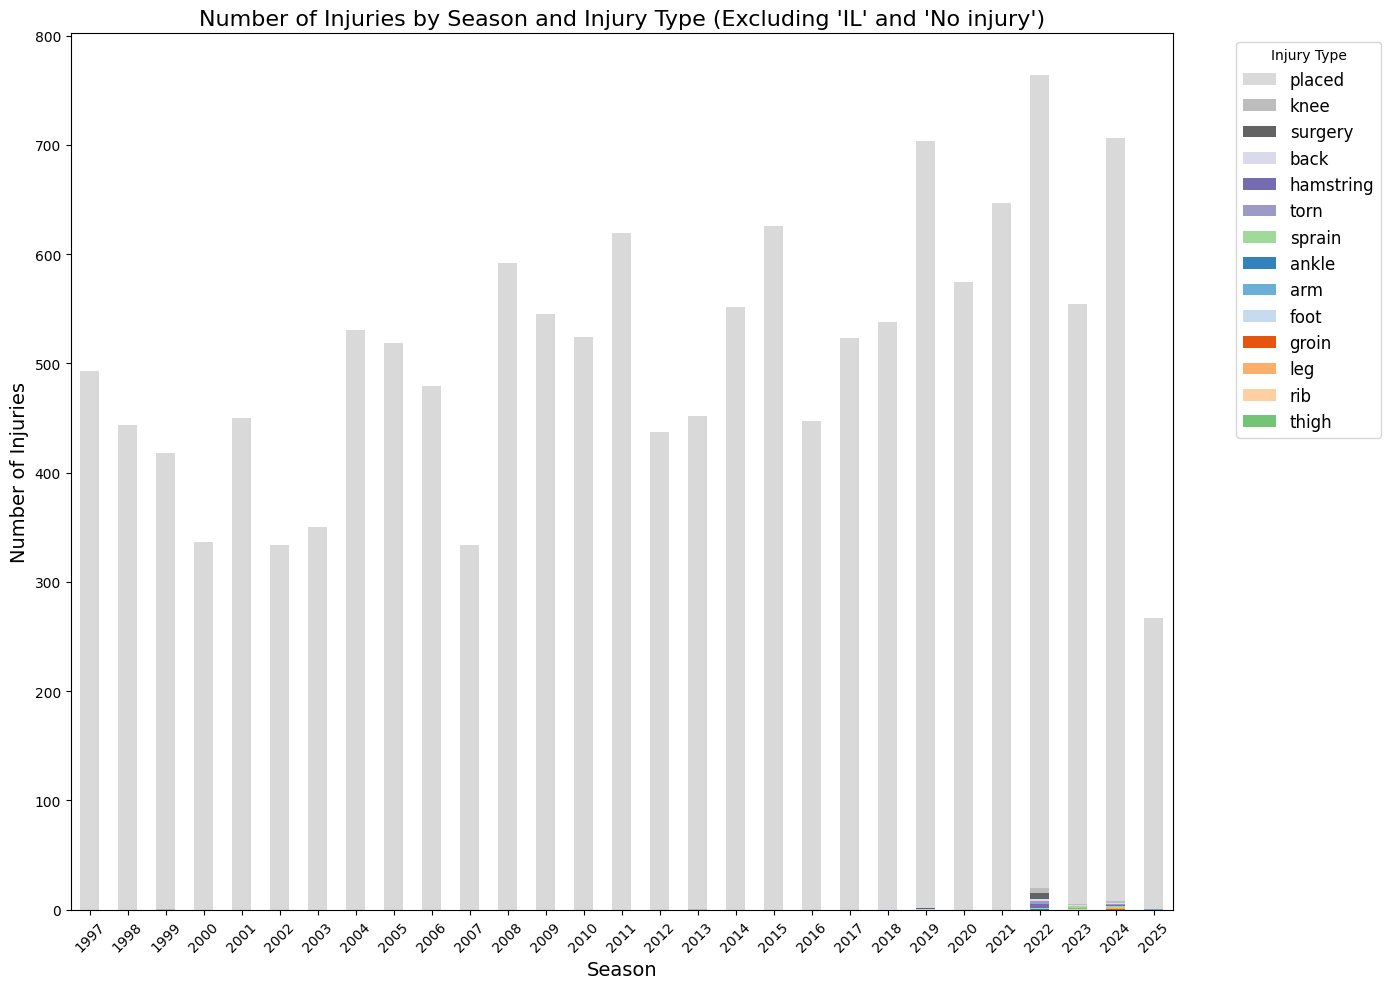

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out "IL" and "No injury" from the data
filtered_injury_df = nba_injuries_df[
    ~nba_injuries_df['Injury_type'].isin(['IL', 'No injury'])
]

# Group/sort data
injury_counts = (
    filtered_injury_df.groupby(['season', 'Injury_type']).size().unstack(fill_value=0)
)

# Sort columns (Injury Types) by total counts to display largest on the bottom
injury_counts = injury_counts[injury_counts.sum().sort_values(ascending=True).index]

# Plot sorted stacked bar chart
plt.figure(figsize=(14, 10))
palette = sns.husl_palette(n_colors=len(injury_counts.columns), s=0.9, l=0.65)

# Plot the stacked bar chart
ax = injury_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 10),
    colormap="tab20c"
)

# Add labels and title
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.title("Number of Injuries by Season and Injury Type (Excluding 'IL' and 'No injury')", fontsize=16)

# Set legend to match sorted order
handles, labels = ax.get_legend_handles_labels()
sorted_legend = sorted(zip(handles, labels), key=lambda x: injury_counts[x[1]].sum(), reverse=True)
handles, labels = zip(*sorted_legend)
plt.legend(handles, labels, title="Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()

In [ ]:
# Filter out rows with seasons after 2018
injury_related_df = injury_related_df[injury_related_df['season'] <= 2018]

# Display dataset head
injury_related_df.head()

,seas_id_x,season,player_id,player_x,pos_x,age_x,experience_x,lg_x,tm_x,g_x,...,stl,blk,tov,pf,pts,Date,Team,Notes,Injury_type,Injured
7734,26918,2018,3731,Aaron Brooks,PG,33,10,NBA,MIN,32,...,6.0,0.0,11.0,28,75,2005-11-30,Heat,placed on IL,placed,1.0
7735,26919,2018,4219,Aaron Gordon,PF,22,4,NBA,ORL,58,...,59.0,45.0,107.0,111,1022,2005-11-30,Heat,activated from IL,No injury,0.0
7736,26920,2018,4301,Aaron Harrison,SG,23,3,NBA,DAL,9,...,9.0,2.0,3.0,27,60,2005-11-30,Hornets,placed on IL,placed,1.0
7737,26921,2018,4462,Aaron Jackson,PG,31,1,NBA,HOU,1,...,0.0,0.0,1.0,4,8,2005-11-30,Hornets,activated from IL,No injury,0.0
7738,26922,2018,4463,Abdel Nader,SF,24,1,NBA,BOS,48,...,15.0,10.0,34.0,45,146,2005-11-30,Nuggets,placed on IL with sprained left ankle,placed,1.0


Positions of Top 10 Injured Players After 2018:
                player_x  pos_x
11            Alec Burks     SG
20        Andre Drummond      C
62         Cameron Payne     PG
276          Luke Kornet      C
359    Spencer Dinwiddie     PG
1217        Mike Muscala      C
1405    Robert Covington     PF
1411    Robert Covington     SF
1508      Svi Mykhailiuk     SF
3248         Greg Monroe      C
4008   Spencer Dinwiddie  PG-SG
4014   Spencer Dinwiddie     SG
4977         Luke Kornet   C-PF
4980         Luke Kornet     PF
5289      Svi Mykhailiuk  SF-SG
5295      Svi Mykhailiuk     SG
5458          Alec Burks  SF-SG
5461          Alec Burks     SF
5579      Caleb Swanigan   PF-C
5582      Caleb Swanigan      C
5585      Caleb Swanigan     PF
5590       Cameron Payne     SG
6275    Robert Covington   PF-C
6281    Robert Covington      C
7284        Mike Muscala     PF
11008        Greg Monroe     PF

Injuries by Position After 2018:
pos_x
C           741
C-PF          9
PF          834


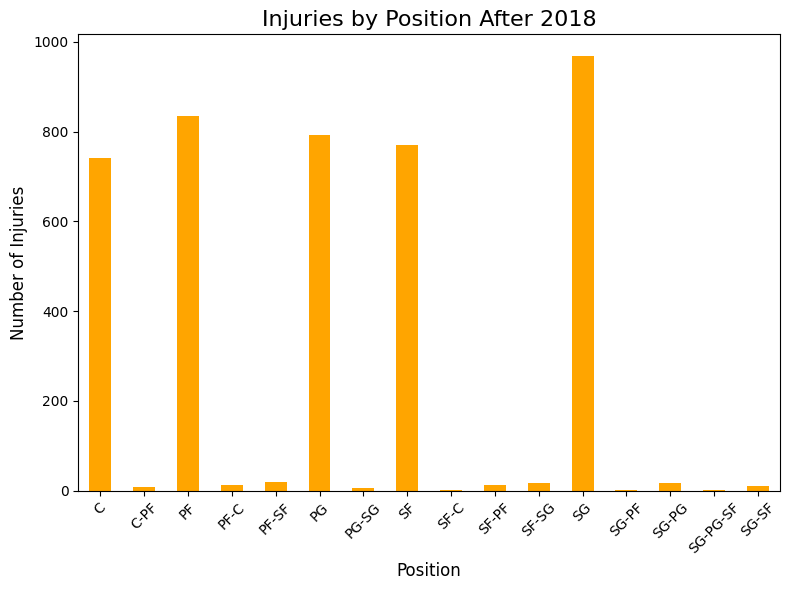

In [ ]:
# List top 10 injured players after 2018 (from the chart)
top_injured_players = ["Greg Monroe", "Luke Kornet", "Alec Burks", "Mike Muscala",
                       "Robert Covington", "Andre Drummond", "Spencer Dinwiddie",
                       "Svi Mykhailiuk", "Cameron Payne", "Caleb Swanigan"]

# Filter the dataset for the top injured players
top_players_data = nba_injuries_df_cleaned[
    nba_injuries_df_cleaned['player_x'].isin(top_injured_players)
]

# Group by player and position
player_positions = top_players_data[['player_x', 'pos_x']].drop_duplicates()

# Display the positions of the top injured players
print("Positions of Top 10 Injured Players After 2018:")
print(player_positions)

# Analyze injury trends by position
# Count injuries for each position
injuries_by_position = nba_injuries_df_cleaned[
    (nba_injuries_df_cleaned['season'] > 2018) &
    (nba_injuries_df_cleaned['Injured'] == 1)
].groupby('pos_x').size()

# Display injury trends by position
print("\nInjuries by Position After 2018:")
print(injuries_by_position)

# Plot injuries by position
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
injuries_by_position.plot(kind='bar', color='orange')
plt.title("Injuries by Position After 2018", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Injuries by Position (1997-2018):
pos_x
PG       2317
PF       2122
SG       1990
C        1932
SF       1915
PG-SG      40
C-PF       40
SG-SF      36
SG-PG      35
SF-SG      32
PF-C       28
PF-SF      26
SF-PF      24
SG-PF       6
PG-SF       1
Name: count, dtype: int64


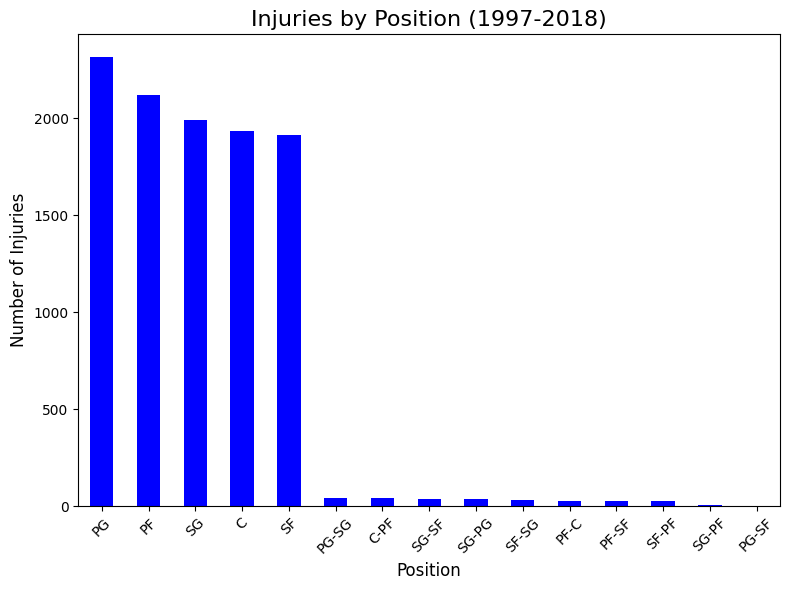

In [ ]:
# Filter dataset for years 1997-2018 and injured players only
injuries_1997_2018 = nba_injuries_df_cleaned[
    (nba_injuries_df_cleaned['season'] >= 1997) &
    (nba_injuries_df_cleaned['season'] <= 2018) &
    (nba_injuries_df_cleaned['Injured'] == 1)
]

# Count the number of injuries for each position
injuries_by_position_1997_2018 = injuries_1997_2018['pos_x'].value_counts()

# Display the counts
print("Injuries by Position (1997-2018):")
print(injuries_by_position_1997_2018)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
injuries_by_position_1997_2018.plot(kind='bar', color='blue')
plt.title("Injuries by Position (1997-2018)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


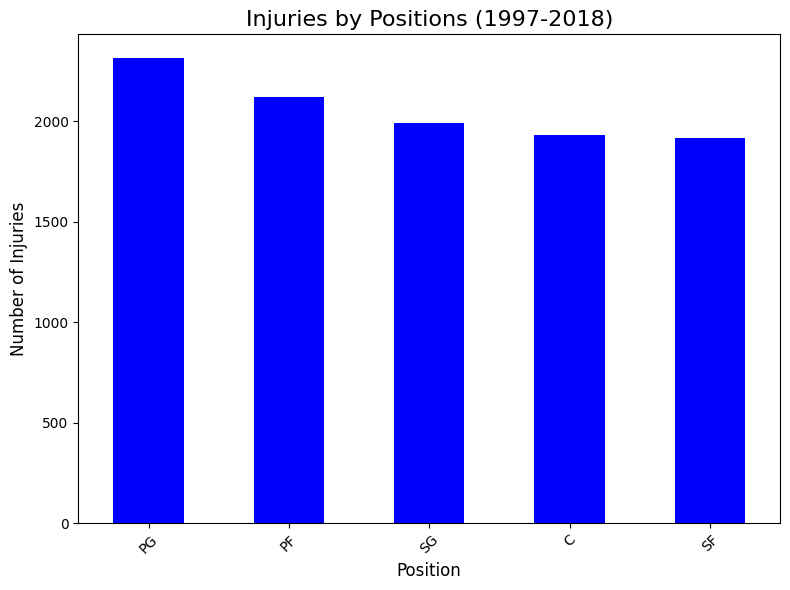

In [ ]:
import matplotlib.pyplot as plt

# Filter out hybrid positions
non_hybrid_positions = ['PG', 'SG', 'SF', 'PF', 'C']
injuries_by_non_hybrid_positions = injuries_by_position_1997_2018.loc[non_hybrid_positions]

# Sort the counts from highest to lowest
injuries_by_non_hybrid_positions = injuries_by_non_hybrid_positions.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 6))
injuries_by_non_hybrid_positions.plot(kind='bar', color='blue')
plt.title("Injuries by Positions (1997-2018)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Most Commonly Injured Players (1997-2018):
player_x
Nazr Mohammed     35
Joe Smith         33
Ersan İlyasova    31
Doug Overton      30
Drew Gooden       27
Jim Jackson       27
Ish Smith         26
Tim Thomas        26
Ramon Sessions    25
Andre Miller      25
Name: count, dtype: int64


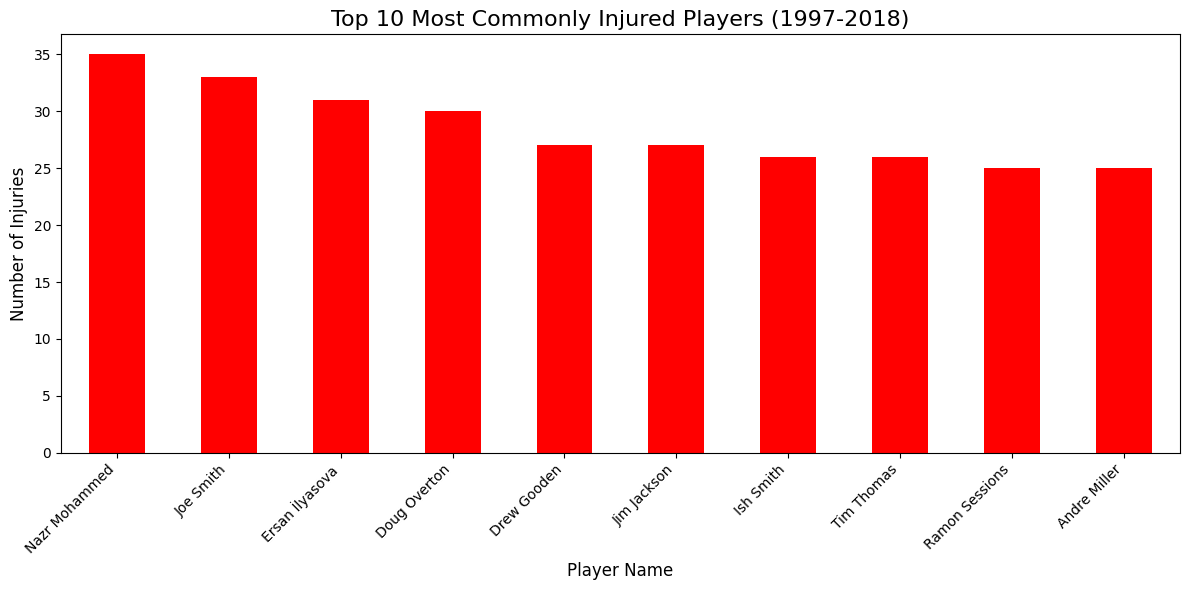

In [ ]:
import pandas as pd

# Filter dataset for years 1997-2018 and injured players only
injured_players_df = nba_injuries_df_cleaned[
    (nba_injuries_df_cleaned['season'] >= 1997) &
    (nba_injuries_df_cleaned['season'] <= 2018) &
    (nba_injuries_df_cleaned['Injured'] == 1)
]

# Count the number of injuries for each player
player_injury_counts = injured_players_df['player_x'].value_counts()

# Display the top 10 most commonly injured players
print("Top 10 Most Commonly Injured Players (1997-2018):")
print(player_injury_counts.head(10))

# Plot the top 10 most commonly injured players
import matplotlib.pyplot as plt

top_players = player_injury_counts.head(10)
plt.figure(figsize=(12, 6))
top_players.plot(kind='bar', color='red')
plt.title("Top 10 Most Commonly Injured Players (1997-2018)", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Most Injured Player(s) After 2018:
player_x
Greg Monroe    34
Name: count, dtype: int64


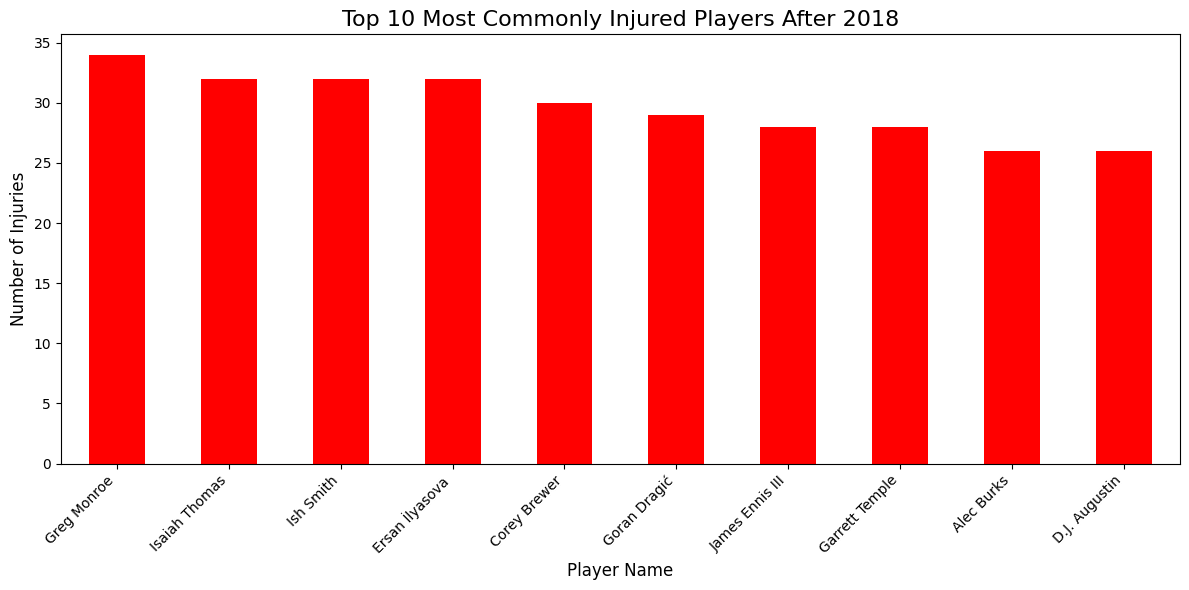

In [ ]:
# Filter dataset for years after 2018 and injured players only
injured_players_after_2018_df = nba_injuries_df_cleaned[
    (nba_injuries_df_cleaned['season'] > 2008) &
    (nba_injuries_df_cleaned['Injured'] == 1)
]

# Count the number of injuries for each player
player_injury_counts_after_2018 = injured_players_after_2018_df['player_x'].value_counts()

# Display the most injured player(s) after 2018
print("Most Injured Player(s) After 2018:")
print(player_injury_counts_after_2018.head(1))

# Plot the most injured players after 2018
import matplotlib.pyplot as plt

top_players_after_2018 = player_injury_counts_after_2018.head(10)
plt.figure(figsize=(12, 6))
top_players_after_2018.plot(kind='bar', color='red')
plt.title("Top 10 Most Commonly Injured Players After 2018", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Count of Injuries for Each Player:
player_x
Kevin Durant     25
LeBron James     22
Anthony Davis    13
Name: count, dtype: int64


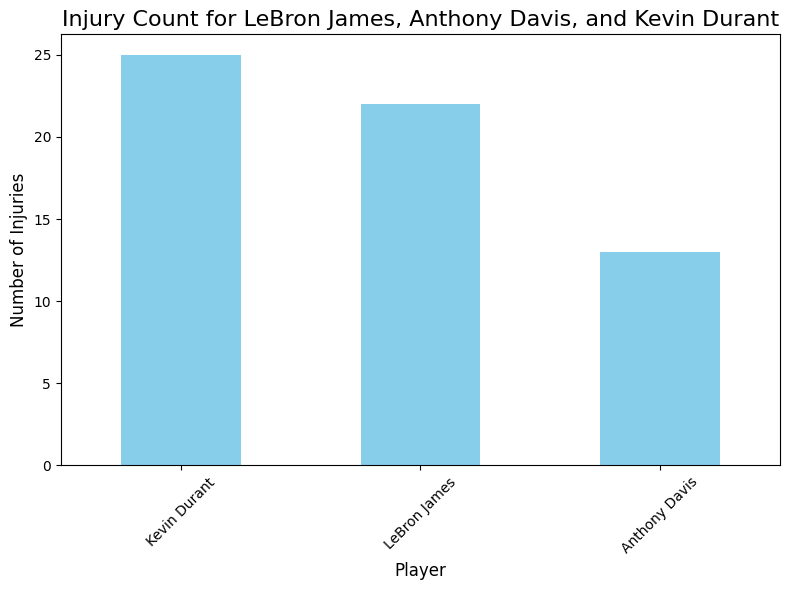

In [ ]:
# List of player names to search for
players_to_search = ["LeBron James", "Anthony Davis", "Kevin Durant"]

# Filter the dataset for the specified player names
searched_players = nba_injuries_df_cleaned[nba_injuries_df_cleaned['player_x'].isin(players_to_search)]

# Count the number of injuries for each player
injury_counts = searched_players['player_x'].value_counts()

# Display the results
print("Count of Injuries for Each Player:")
print(injury_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
injury_counts.plot(kind='bar', color='skyblue')
plt.title("Injury Count for LeBron James, Anthony Davis, and Kevin Durant", fontsize=16)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 19908 entries, 7734 to 27641
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id_x                      19908 non-null  int64  
 1   season                         19908 non-null  int64  
 2   player_id                      19908 non-null  int64  
 3   player_x                       19908 non-null  object 
 4   pos_x                          19908 non-null  object 
 5   age_x                          19908 non-null  int64  
 6   experience_x                   19908 non-null  int64  
 7   lg_x                           19908 non-null  object 
 8   tm_x                           19908 non-null  object 
 9   g_x                            19908 non-null  int64  
 10  mp_x                           19908 non-null  int64  
 11  fg_percent_x                   19908 non-null  float64
 12  avg_dist_fga               

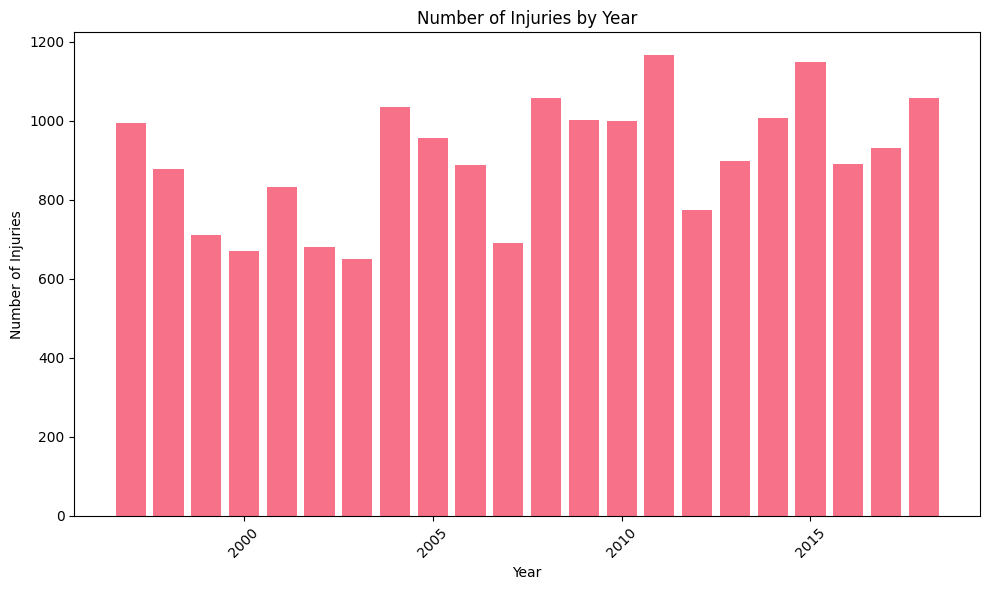

In [ ]:
# Display general info about the dataset
print("Dataset Information:")
injury_related_df.info()

# Summary stats for numeric columns
print("\nSummary Statistics:")
print(injury_related_df.describe())

# Distribution of injury types
print("\nInjury Type Distribution:")
print(injury_related_df['Injury_type'].value_counts())

# Visualize number of injuries by season
import matplotlib.pyplot as plt

injury_by_season = injury_related_df['season'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(injury_by_season.index, injury_by_season.values)
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yearly injury tybe breakdown

## Feature Analysis

### Age-Injury Correlation

<ipython-input-7-dd581446496f>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injury_count_by_age_group = injury_df[injury_df['Injured'] == 1].groupby('age_group').size()


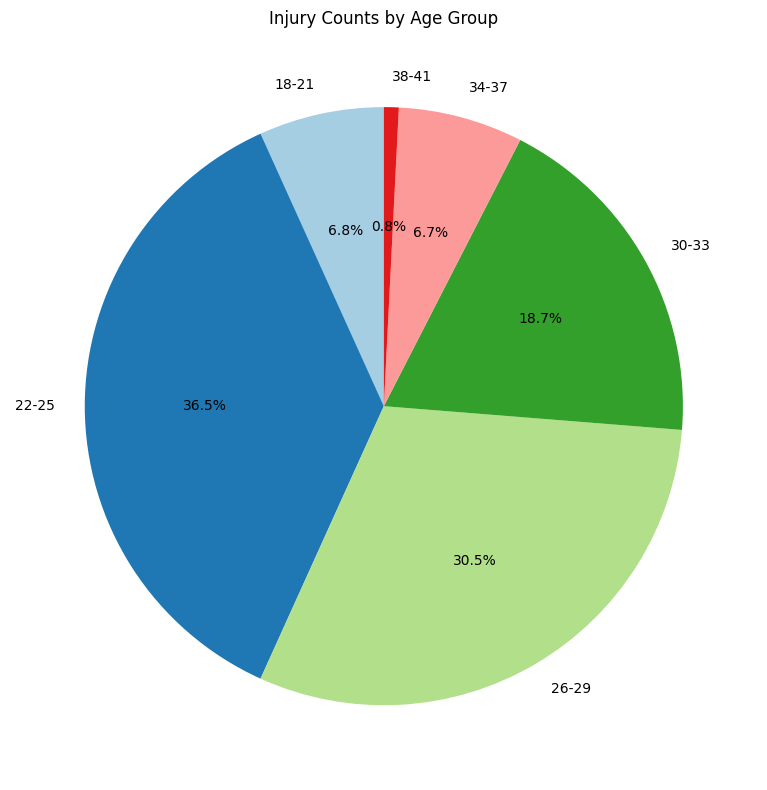

<ipython-input-7-dd581446496f>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_age_df['age_group'] = pd.cut(player_age_df['age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-7-dd581446496f>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  player_count_by_age_group = player_age_df.groupby('age_group').size()


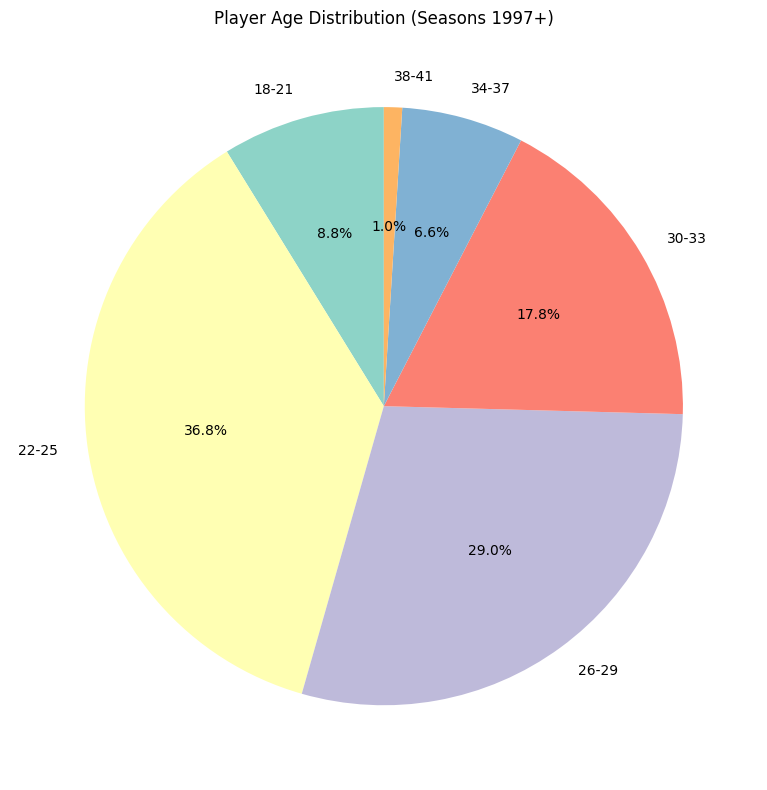

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset URLs
injury_dataset_url = "https://raw.githubusercontent.com/stevenLeecode/CSC398-NbaInjuries/refs/heads/main/final_player_data.csv"
age_dataset_url = "https://raw.githubusercontent.com/stevenLeecode/CSC398-NbaInjuries/refs/heads/main/NBA-Stats%20Dataset/Player%20Season%20Info.csv"

# Loading datasets
injury_df = pd.read_csv(injury_dataset_url)
player_age_df = pd.read_csv(age_dataset_url)

injury_df.drop(columns=['Unnamed: 0'])
player_age_df['season'] >= 1997

# Processing Injury Dataset
age_bins = [18, 22, 26, 30, 34, 38, 42]
age_labels = ["18-21", "22-25", "26-29", "30-33", "34-37", "38-41"]
injury_df['age_group'] = pd.cut(injury_df['age_x'], bins=age_bins, labels=age_labels, right=False)

# Injury counts by age group
injury_count_by_age_group = injury_df[injury_df['Injured'] == 1].groupby('age_group').size()

# Pie chart for injury counts by age group
plt.figure(figsize=(8, 8))
injury_count_by_age_group.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired(range(len(injury_count_by_age_group))),
    labels=injury_count_by_age_group.index
)
plt.title("Injury Counts by Age Group")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Processing Player Age Dataset
player_age_df = player_age_df[player_age_df['season'] >= 1997]
player_age_df['age_group'] = pd.cut(player_age_df['age'], bins=age_bins, labels=age_labels, right=False)

# Player count by age group
player_count_by_age_group = player_age_df.groupby('age_group').size()

# Pie chart for player age distribution
plt.figure(figsize=(8, 8))
player_count_by_age_group.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3(range(len(player_count_by_age_group))),
    labels=player_count_by_age_group.index
)
plt.title("Player Age Distribution (Seasons 1997+)")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Machine Learning

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as ticker
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

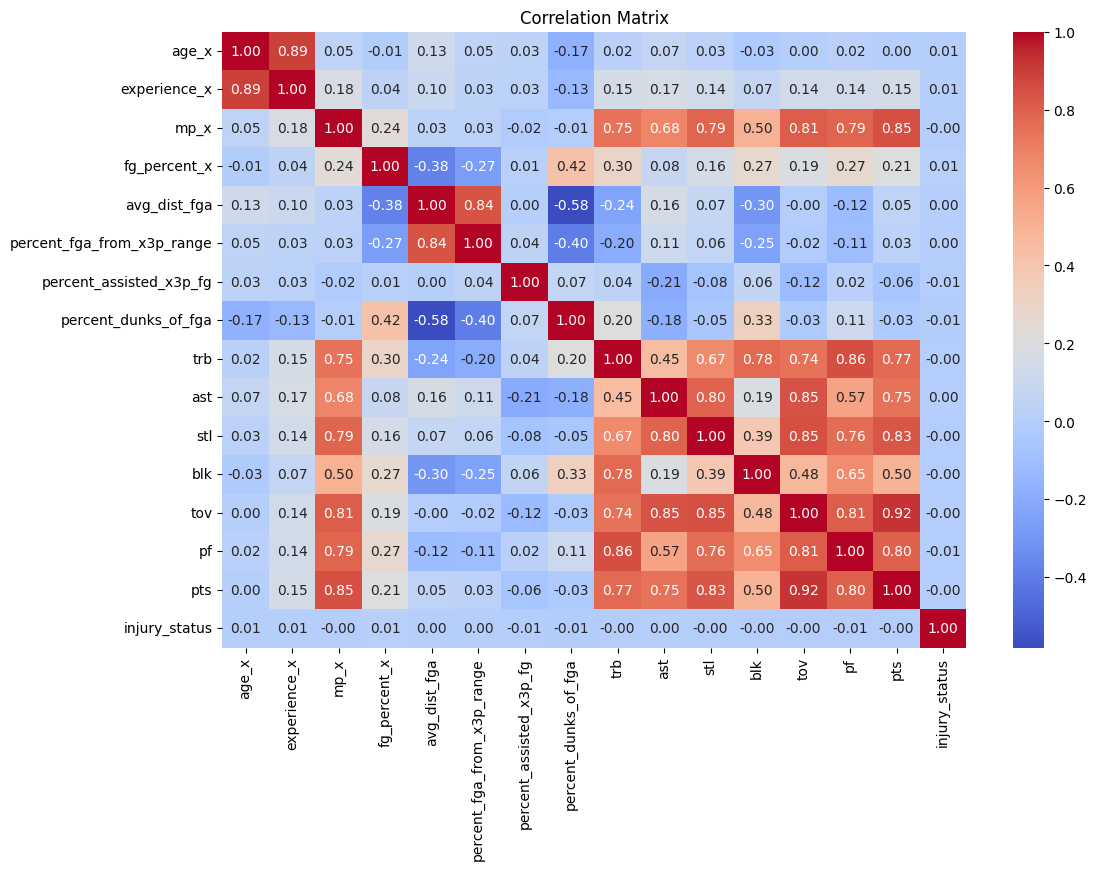

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.41      1880
           1       0.50      0.55      0.52      2102

    accuracy                           0.47      3982
   macro avg       0.47      0.47      0.46      3982
weighted avg       0.47      0.47      0.47      3982



<ipython-input-36-96ba4817b284>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


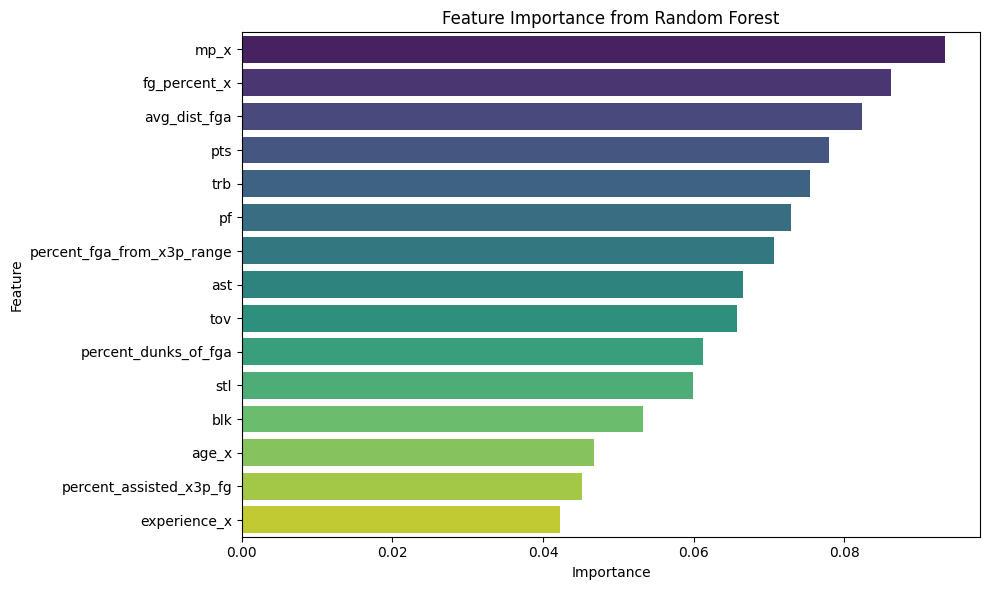

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the dataset
data = nba_injuries_df_cleaned.copy()
data = data[(data['season'] >= 1997) & (data['season'] <= 2018)]

# Encode injury status: 1 for injured, 0 for not injured
data['injury_status'] = data['Injured'].fillna(0).astype(int)

# Potential features and the target variable
features = [
    'age_x', 'experience_x', 'mp_x', 'fg_percent_x', 'avg_dist_fga',
    'percent_fga_from_x3p_range', 'percent_assisted_x3p_fg', 'percent_dunks_of_fga',
    'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]
target = 'injury_status'

# Drop rows with missing values
data = data.dropna(subset=features)

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature importance using Random Forest
X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance plot
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


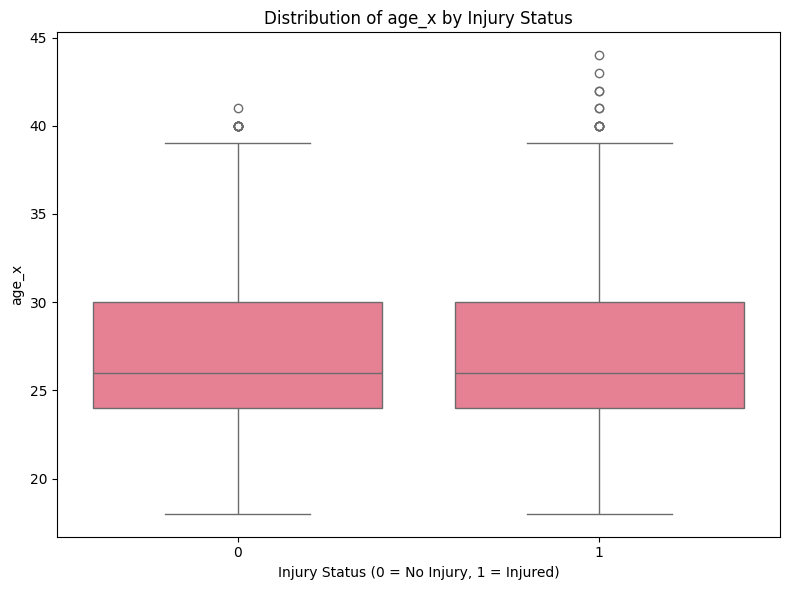

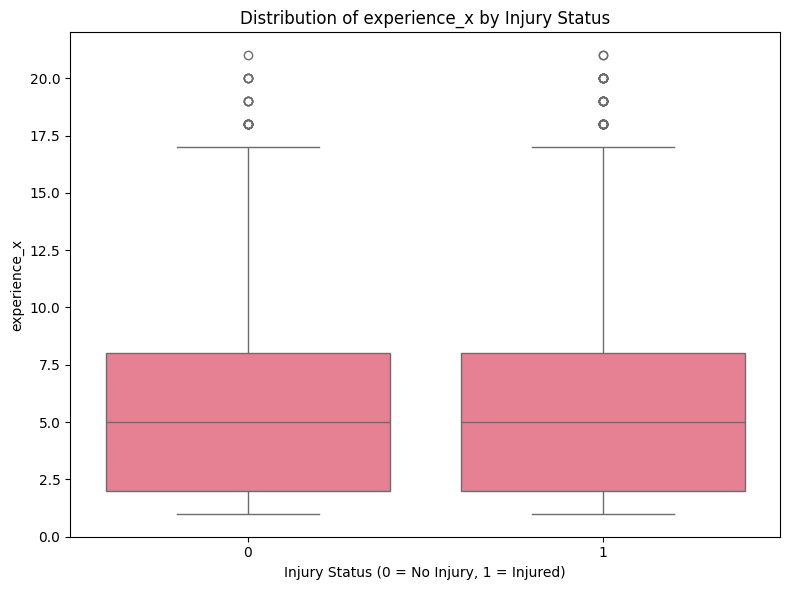

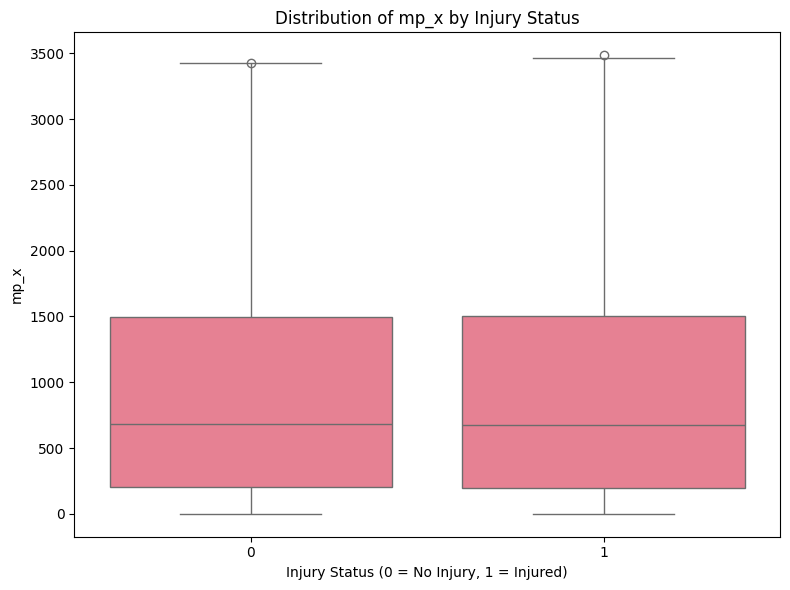

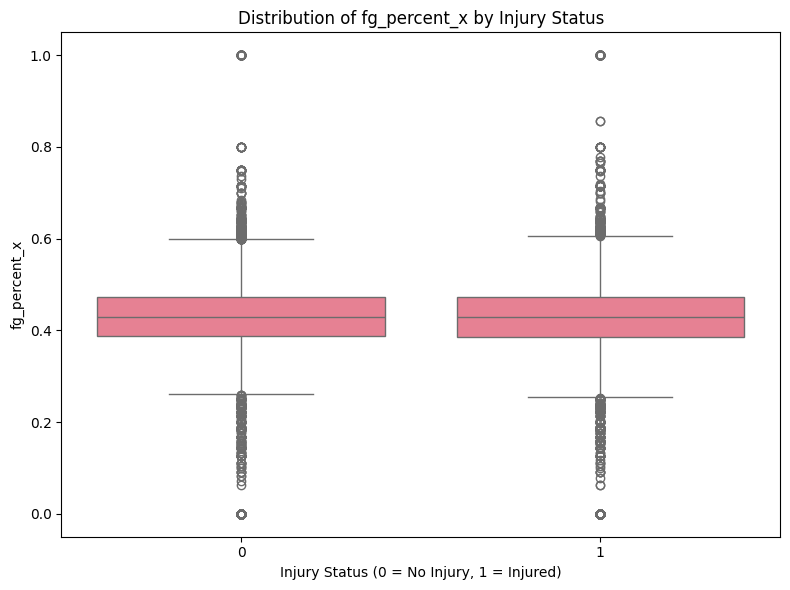

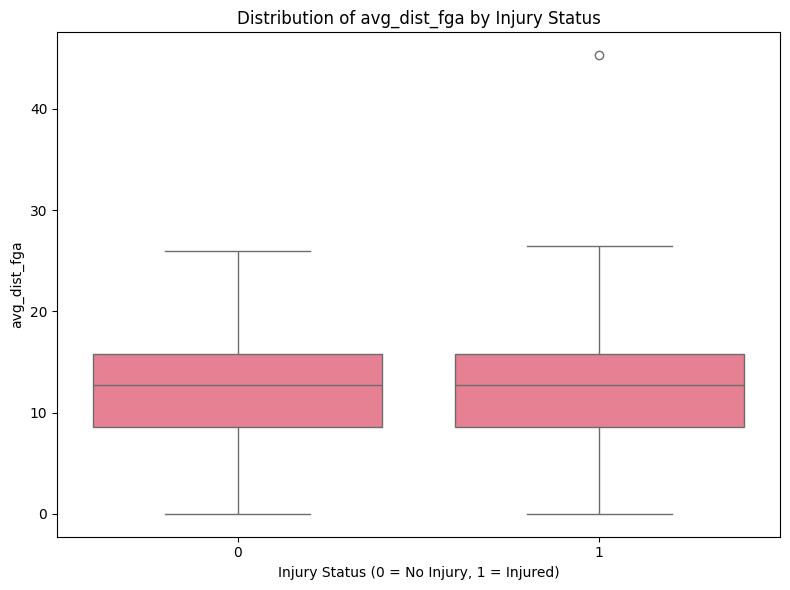

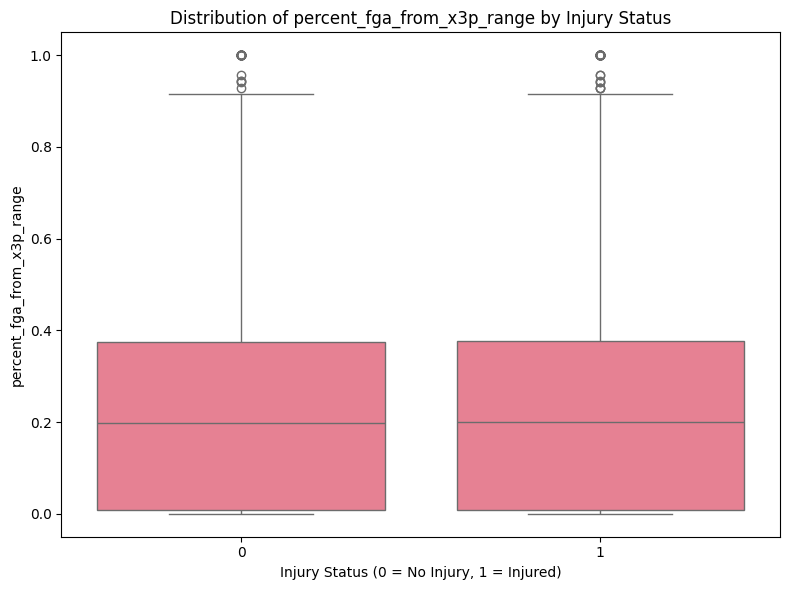

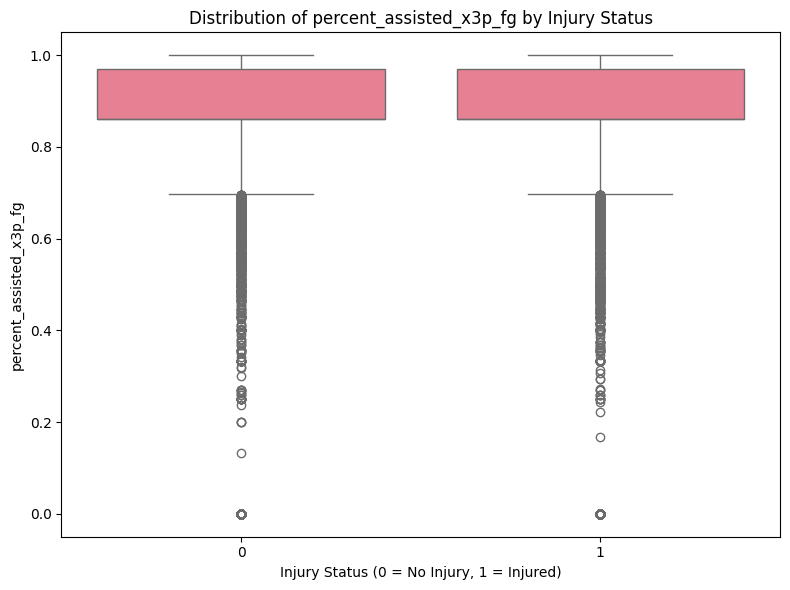

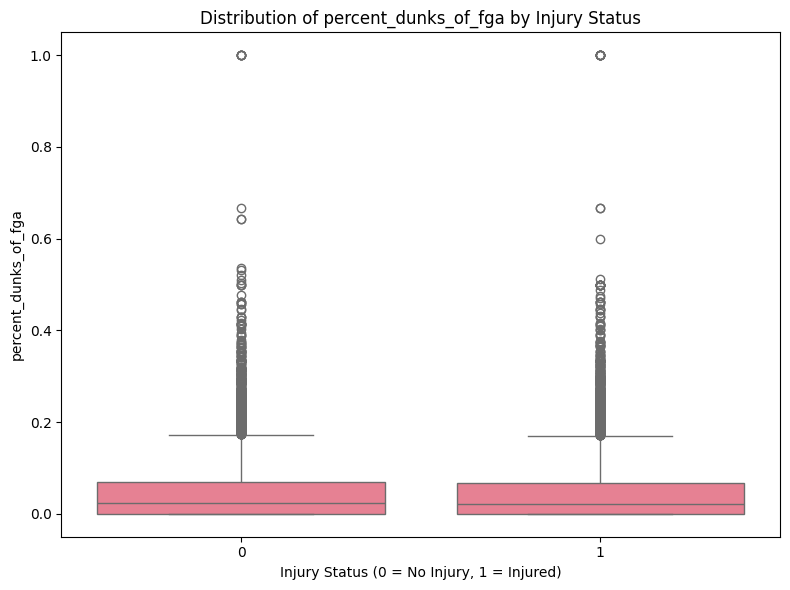

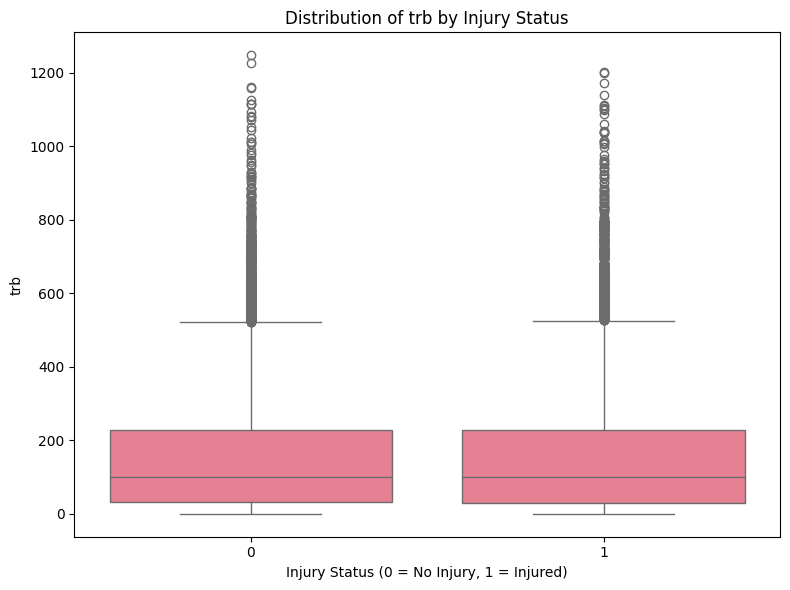

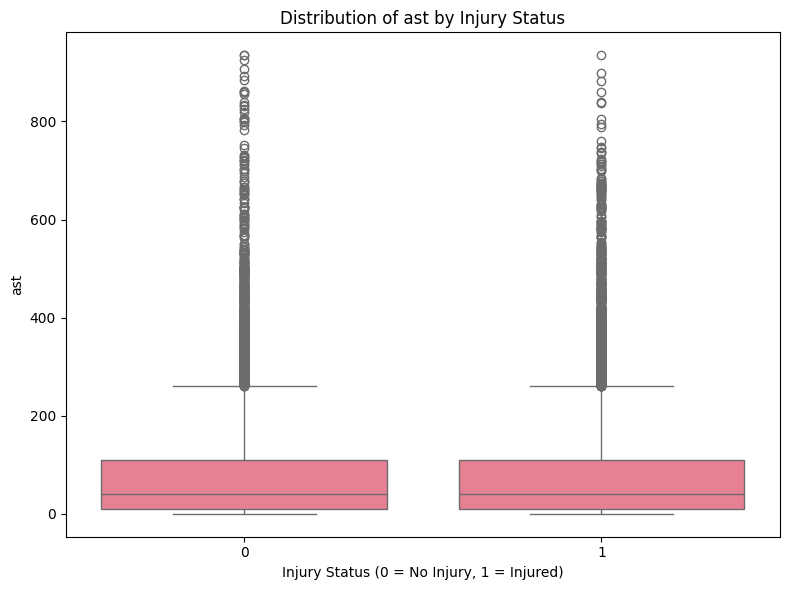

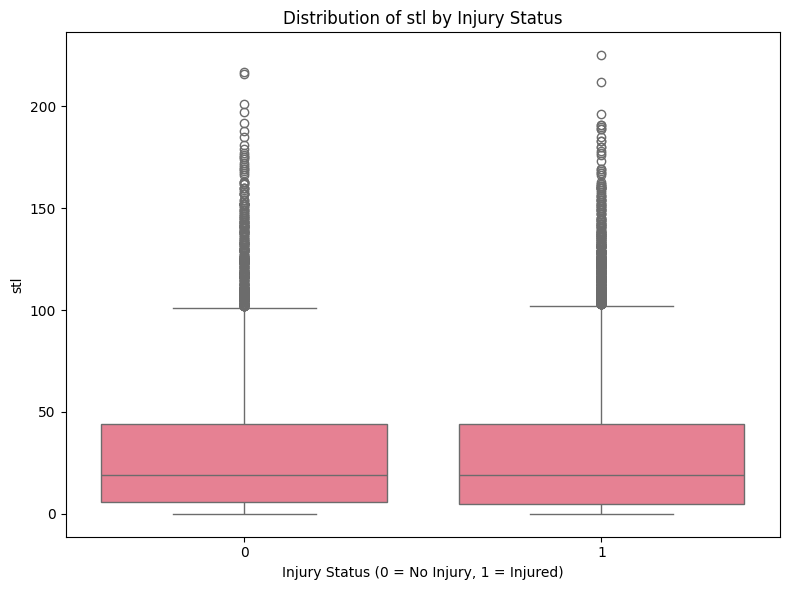

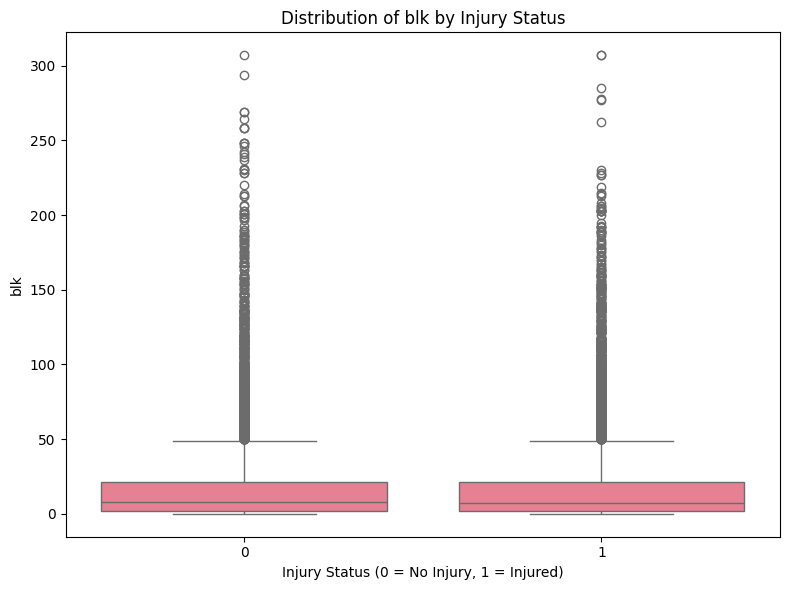

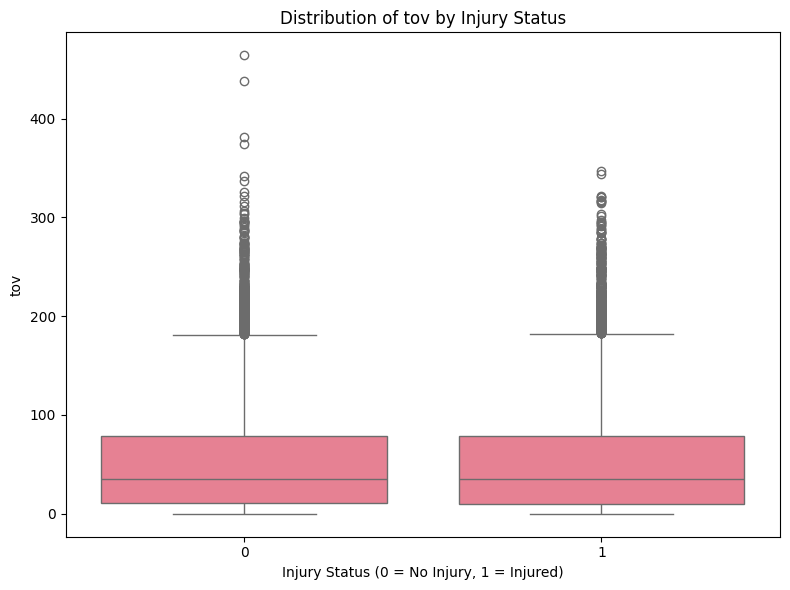

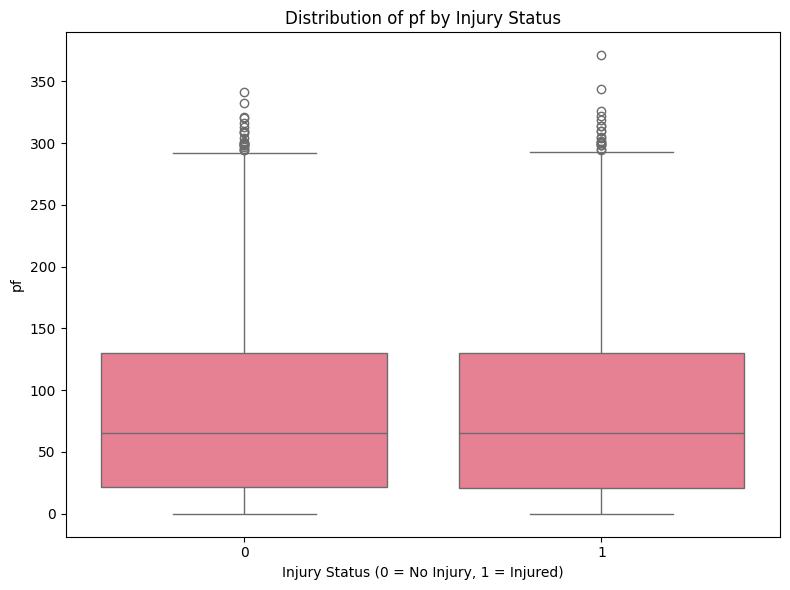

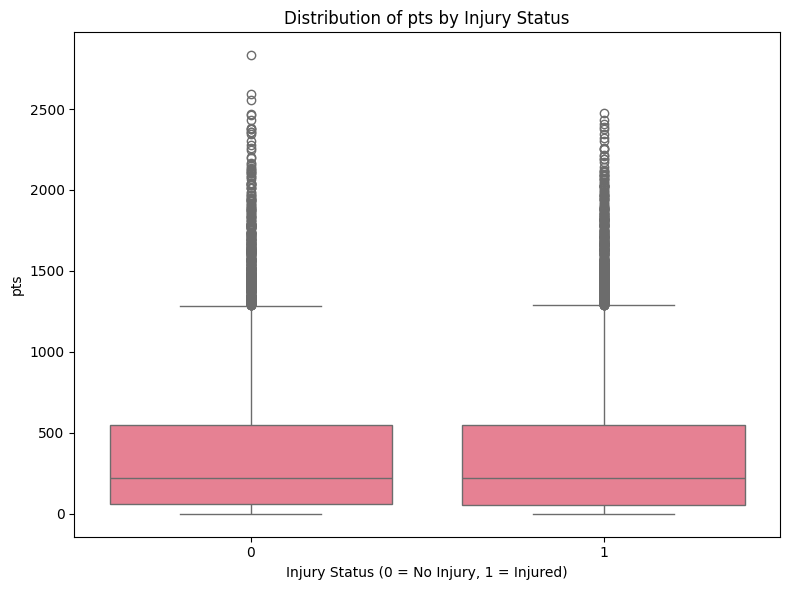

In [ ]:
# Boxplots for injured vs. non-injured players stats
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='injury_status', y=feature, data=data)
    plt.title(f"Distribution of {feature} by Injury Status")
    plt.xlabel("Injury Status (0 = No Injury, 1 = Injured)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

--- Logistic Regression ---
AUC-ROC: 0.493
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1880
           1       0.53      1.00      0.69      2102

    accuracy                           0.53      3982
   macro avg       0.26      0.50      0.35      3982
weighted avg       0.28      0.53      0.36      3982

--- Random Forest ---
AUC-ROC: 0.471
              precision    recall  f1-score   support

           0       0.45      0.37      0.41      1880
           1       0.52      0.60      0.55      2102

    accuracy                           0.49      3982
   macro avg       0.48      0.48      0.48      3982
weighted avg       0.49      0.49      0.48      3982

--- Gradient Boosting ---
AUC-ROC: 0.487
              precision    recall  f1-score   support

           0       0.41      0.08      0.14      1880
           1       0.52      0.90      0.66      2102

    accuracy                           0.51      3982
   macr

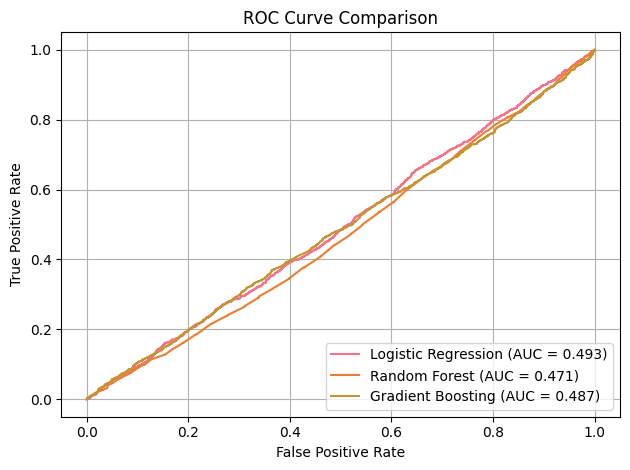

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load and filter data
data = nba_injuries_df_cleaned.copy()
data = data[(data['season'] >= 1997) & (data['season'] <= 2018)]

# Encode injury status: 1 for injured, 0 for not injured
data['injury_status'] = data['Injured'].fillna(0).astype(int)

# Select the most relevant features
selected_features = ['mp_x', 'fg_percent_x', 'avg_dist_fga', 'pts', 'trb', 'pf']
target = 'injury_status'

# Drop rows with missing values in selected features
data = data.dropna(subset=selected_features)

# Define features (X) and target (y)
X = data[selected_features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"--- {name} ---")
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate using AUC-ROC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_score:.3f}")

    # Classification report (threshold=0.5)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Plot settings
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
